# 3. TrainPredict_Feature

## Result:
- Kaggle score: 

## Tensorboard
- Input at command: tensorboard --logdir=./log
- Input at browser: http://127.0.0.1:6006

## Reference
- https://www.kaggle.com/codename007/a-very-extensive-landmark-exploratory-analysis

## Run name

In [1]:
import time
import os
import pandas as pd

project_name = 'Google_LandMark_Rec'
step_name = 'TrainPredict_Feature'
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
run_name = project_name + '_' + step_name + '_' + time_str
print('run_name: ' + run_name)
t0 = time.time()

run_name: Google_LandMark_Rec_TrainPredict_Feature_20180421_110146


## Important params

In [2]:
batch_size = 128
image_size = 299

## Project folder

In [41]:
cwd = os.getcwd()
input_folder = os.path.join(cwd, 'input')
output_folder = os.path.join(cwd, 'output')
model_folder = os.path.join(cwd, 'model')
feature_folder = os.path.join(cwd, 'feature')
post_pca_feature_folder = os.path.join(cwd, 'post_pca_feature')
log_folder = os.path.join(cwd, 'log')
print('input_folder: \t\t\t', input_folder)
print('output_folder: \t\t\t', output_folder)
print('model_folder: \t\t\t', model_folder)
print('feature_folder: \t\t', feature_folder)
print('post_pca_feature_folder: \t', post_pca_feature_folder)
print('log_folder: \t\t\t', log_folder)

org_train_folder = os.path.join(input_folder, 'org_train')
org_test_folder = os.path.join(input_folder, 'org_test')
train_folder = os.path.join(input_folder, 'data_train')
val_folder = os.path.join(input_folder, 'data_val')
test_folder = os.path.join(input_folder, 'data_test')
test_sub_folder = os.path.join(test_folder, 'test')
print('\norg_train_folder: \t\t', org_train_folder)
print('org_test_folder: \t\t', org_test_folder)
print('train_folder: \t\t\t', train_folder)
print('val_folder: \t\t\t', val_folder)
print('test_folder: \t\t\t', test_folder)
print('test_sub_folder: \t\t', test_sub_folder)

if not os.path.exists(post_pca_feature_folder):
    os.mkdir(post_pca_feature_folder)
    print('Create folder: %s' % post_pca_feature_folder)

input_folder: 			 /data1/kaggle/landmark-recognition-challenge/input
output_folder: 			 /data1/kaggle/landmark-recognition-challenge/output
model_folder: 			 /data1/kaggle/landmark-recognition-challenge/model
feature_folder: 		 /data1/kaggle/landmark-recognition-challenge/feature
post_pca_feature_folder: 	 /data1/kaggle/landmark-recognition-challenge/post_pca_feature
log_folder: 			 /data1/kaggle/landmark-recognition-challenge/log

org_train_folder: 		 /data1/kaggle/landmark-recognition-challenge/input/org_train
org_test_folder: 		 /data1/kaggle/landmark-recognition-challenge/input/org_test
train_folder: 			 /data1/kaggle/landmark-recognition-challenge/input/data_train
val_folder: 			 /data1/kaggle/landmark-recognition-challenge/input/data_val
test_folder: 			 /data1/kaggle/landmark-recognition-challenge/input/data_test
test_sub_folder: 		 /data1/kaggle/landmark-recognition-challenge/input/data_test/test


In [4]:
train_csv_file = os.path.join(input_folder, 'train.csv')
test_csv_file = os.path.join(input_folder, 'test.csv')
sample_submission_folder = os.path.join(input_folder, 'sample_submission.csv')

## 获取landmark_id集合

In [5]:
train_csv = pd.read_csv(train_csv_file)
print('train_csv.shape is {0}.'.format(train_csv.shape))
display(train_csv.head(10))

test_csv = pd.read_csv(test_csv_file)
print('test_csv.shape is {0}.'.format(test_csv.shape))
display(test_csv.head(10))

train_csv.shape is (1225029, 3).


,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231
5,2c9c54b62f0a6a37,https://lh5.googleusercontent.com/-mEaSECO7D-4...,10400
6,0aac70a1de44ced6,http://lh6.ggpht.com/-cJMh9AYQGk8/SOkF_Q5PrjI/...,9779
7,de770bc720f8e714,https://lh4.googleusercontent.com/-Q_FvRlwaaa8...,11288
8,dc9457d703e612ad,https://lh3.googleusercontent.com/-Px33Q-wekRI...,13170
9,3060f5f75d936abb,http://lh3.ggpht.com/-KXyELwqwp_Q/Ry-qmQAqwUI/...,6051


test_csv.shape is (117703, 2).


,id,url
0,000088da12d664db,https://lh3.googleusercontent.com/-k45wfamuhT8...
1,0001623c6d808702,https://lh3.googleusercontent.com/-OQ0ywv8KVIA...
2,0001bbb682d45002,https://lh3.googleusercontent.com/-kloLenz1xZk...
3,0002362830cfe3a3,https://lh3.googleusercontent.com/-N6z79jNZYTg...
4,000270c9100de789,https://lh3.googleusercontent.com/-keriHaVOq1U...
5,0002b0fab5d3ccc4,https://lh3.googleusercontent.com/-ciWklpsrab8...
6,000396be3c24830a,https://lh3.googleusercontent.com/-6W9F179t59Q...
7,000506dc6ab3a40e,https://lh3.googleusercontent.com/-_XHsAXB2LZA...
8,0005292fc4b005a3,https://lh3.googleusercontent.com/-RBZ4F1ZKNc0...
9,0005456a82264bc8,https://lh3.googleusercontent.com/-MRK7_uiKO6A...


In [6]:
train_id = train_csv['id']
train_landmark_id = train_csv['landmark_id']
unique_landmark_ids = list(set(train_landmark_id))
len_unique_landmark_ids = len(unique_landmark_ids)
print(unique_landmark_ids[:10]) # 确认landmark_id是从0开始
print('len(unique_landmark_ids)=%d' % len_unique_landmark_ids)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
len(unique_landmark_ids)=14951


## 预览sample_submission.csv

In [7]:
sample_submission_csv = pd.read_csv(sample_submission_folder)
print('sample_submission_csv.shape is {0}.'.format(sample_submission_csv.shape))
display(sample_submission_csv.head(2))

sample_submission_csv.shape is (117703, 2).


,id,landmarks
0,000088da12d664db,8815 0.03
1,0001623c6d808702,7249 0.61


## 加载feature

In [8]:
%%time
import h5py
import numpy as np
from sklearn.utils import shuffle
np.random.seed(2018)

x_train = []
y_train = {}
x_val = []
y_val = {}
x_test = []

time_str = '300_20180421-054322'
# feature_cgg16 = os.path.join(cwd, 'feature', 'feature_VGG16_{}.h5'.format(20180219))
# feature_cgg19 = os.path.join(cwd, 'feature', 'feature_VGG19_{}.h5'.format(20180219))
# feature_resnet50 = os.path.join(cwd, 'feature', 'feature_ResNet50_{}.h5'.format(20180220))
# feature_xception = os.path.join(cwd, 'feature', 'feature_Xception_{}.h5'.format(20180221))
# feature_inceptionV3 = os.path.join(cwd, 'feature', 'feature_InceptionV3_%s.h5' % time_str)
feature_inceptionResNetV2 = os.path.join(feature_folder, 'feature_InceptionResNetV2_%s.h5' % time_str)
# for filename in [feature_cgg16, feature_cgg19, feature_resnet50, feature_xception, feature_inception, feature_inceptionResNetV2]:
for file_name in [feature_inceptionResNetV2]:
    print('Load file: %s' % file_name)
    with h5py.File(file_name, 'r') as h:
        x_train.append(np.array(h['train']))
        y_train = np.array(h['train_labels'])
        x_val.append(np.array(h['val']))
        y_val = np.array(h['val_labels'])
        x_test.append(np.array(h['test']))

Load file: /data1/kaggle/landmark-recognition-challenge/feature/feature_InceptionResNetV2_300_20180421-054322.h5


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


CPU times: user 3.78 s, sys: 8.78 s, total: 12.6 s
Wall time: 5min 5s


In [9]:
print(x_train[0].shape)
print(len(y_train))
print(x_val[0].shape)
print(len(y_val))
print(x_test[0].shape)

(1193691, 1536)
1193691
(24362, 1536)
24362
(115619, 1536)


In [10]:
%%time
x_train = np.concatenate(x_train, axis=-1)
x_val = np.concatenate(x_val, axis=-1)
x_test = np.concatenate(x_test, axis=-1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(1193691, 1536)
(24362, 1536)
(115619, 1536)
CPU times: user 1.73 s, sys: 4.06 s, total: 5.79 s
Wall time: 5.78 s


In [11]:
%%time
from sklearn.utils import shuffle
(x_train, y_train) = shuffle(x_train, y_train)

CPU times: user 1.49 s, sys: 3.16 s, total: 4.65 s
Wall time: 4.65 s


In [12]:
from sklearn.model_selection import train_test_split
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.0025, random_state=5)

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(1193691, 1536)
(1193691,)
(24362, 1536)
(24362,)


In [13]:
from keras.utils.np_utils import to_categorical

def data_generator(x_train, y_train, batch_size, num_classes):
    len_x_train = len(x_train)
    start_index = 0
    end_index = 0
    while(1):
        end_index = start_index + batch_size
        if end_index < len_x_train:
#             print(start_index, end_index, end=' ')
            x_batch = x_train[start_index: end_index, :]
            y_batch = y_train[start_index: end_index]
            y_batch_cat = to_categorical(y_batch, num_classes)
            
            start_index = start_index + batch_size
#             print(x_batch.shape, y_batch_cat.shape)
            yield x_batch, y_batch_cat
        else:
            end_index = end_index-len_x_train
#             print(start_index, end_index, end=' ')
            x_batch = np.vstack((x_train[start_index:, :], x_train[:end_index, :]))
            y_batch = np.concatenate([y_train[start_index:], y_train[:end_index]])
            y_batch_cat = to_categorical(y_batch, num_classes)
            
            start_index = end_index
#             print(x_batch.shape, y_batch_cat.shape)
            yield x_batch, y_batch_cat

Using TensorFlow backend.


In [14]:
len_train = len(y_train)

steps_per_epoch=int(len_train/batch_size)
print(len_train, batch_size, steps_per_epoch)

train_gen = data_generator(x_train, y_train, batch_size, len_unique_landmark_ids)
batch_data = next(train_gen)
print(batch_data[0].shape, batch_data[1].shape)

1193691 128 9325
(128, 1536) (128, 14951)


In [15]:
y_val_cat = to_categorical(y_val, len_unique_landmark_ids)

## Build NN

In [16]:
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, TensorBoard

In [17]:
def get_lr(x):
    lr = round(3e-4 * 0.98 ** x, 6)
    if lr < 1e-5:
        lr = 1e-5
    print(lr, end='  ')
    return lr

# annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
annealer = LearningRateScheduler(get_lr)

log_dir = os.path.join(log_folder, run_name)
print('log_dir:' + log_dir)
tensorBoard = TensorBoard(log_dir=log_dir)

log_dir:/data1/kaggle/landmark-recognition-challenge/log/Google_LandMark_Rec_TrainPredict_Feature_20180421_110146


In [18]:
model = Sequential()
model.add(Dense(4096, input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4096, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len_unique_landmark_ids, activation='softmax'))

model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4096)              6295552   
_________________________________________________________________
batch_normalization_1 (Batch (None, 4096)              16384     
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
batch_normalization_2 (Batch (None, 4096)              16384     
_________________________________________________________________
dropout_2 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 14951)             61254247  
Total para

In [20]:
%%time
hist = model.fit_generator(train_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=10, #Increase this when not on Kaggle kernel
    verbose=1,  #1 for ETA, 0 for silent
    callbacks=[annealer],
    max_queue_size=8,
    workers=1,
    use_multiprocessing=False,
    validation_data=(x_val, y_val_cat))

Epoch 1/10
9325/9325 [==============================] - 313s 34ms/step - loss: 2.7684 - acc: 0.5388 - val_loss: 1.6553 - val_acc: 0.6823
Epoch 2/10
9325/9325 [==============================] - 311s 33ms/step - loss: 1.5133 - acc: 0.6961 - val_loss: 1.3179 - val_acc: 0.7404
Epoch 3/10
9325/9325 [==============================] - 309s 33ms/step - loss: 1.1289 - acc: 0.7566 - val_loss: 1.1459 - val_acc: 0.7751
Epoch 4/10
9325/9325 [==============================] - 309s 33ms/step - loss: 0.9136 - acc: 0.7936 - val_loss: 1.0733 - val_acc: 0.7904
Epoch 5/10
9325/9325 [==============================] - 309s 33ms/step - loss: 0.7762 - acc: 0.8186 - val_loss: 1.0221 - val_acc: 0.8023
Epoch 6/10
9325/9325 [==============================] - 309s 33ms/step - loss: 0.6754 - acc: 0.8381 - val_loss: 1.0030 - val_acc: 0.8078
Epoch 7/10
9325/9325 [==============================] - 309s 33ms/step - loss: 0.6013 - acc: 0.8524 - val_loss: 0.9744 - val_acc: 0.8153
Epoch 8/10
9325/9325 [===================

In [21]:
final_loss, final_acc = model.evaluate(x_val, y_val_cat, verbose=1)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

24362/24362 [==============================] - 4s 154us/step
Final loss: 0.9276, final accuracy: 0.8259


In [22]:
run_name_acc = run_name + '_' + str(int(final_acc*10000)).zfill(4)

In [23]:
histories = pd.DataFrame(hist.history)
histories['epoch'] = hist.epoch
print(histories.columns)
histories_file = os.path.join(model_folder, run_name_acc + '.csv')
histories.to_csv(histories_file, index=False)

Index(['acc', 'loss', 'val_acc', 'val_loss', 'epoch'], dtype='object')


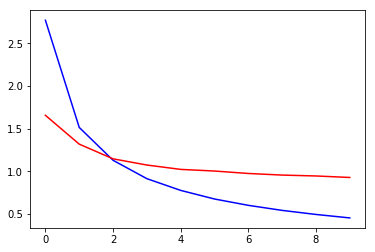

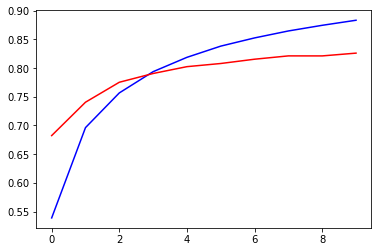

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [25]:
def saveModel(model, run_name):
    cwd = os.getcwd()
    modelPath = os.path.join(cwd, 'model')
    if not os.path.isdir(modelPath):
        os.mkdir(modelPath)
    weigthsFile = os.path.join(modelPath, run_name + '.h5')
    model.save(weigthsFile)
saveModel(model, run_name_acc)

## Predict

In [35]:
# 这里证明os.listdir()得到的图片名称list不正确
files = os.listdir(os.path.join(cwd, 'input', 'data_test', 'test'))
print(files[:10])

['3d8d7d0946abc715.jpg', '48f52f2d6ac1ce30.jpg', '97ab0a1fc0daa989.jpg', '4eeb84778091b5b7.jpg', '5dbec2f259f0b1c2.jpg', '34cf94fc2efe98fd.jpg', '6e7bbdba8fa50888.jpg', '6a94b08945a2e4d1.jpg', '523fc13eb177459b.jpg', '92e13dc918c7479d.jpg']


In [42]:
# 这里证明ImageDataGenerator()得到的图片名称list才是正确
val_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()
# image_size = 299
# batch_size = 128
val_generator = val_gen.flow_from_directory(
    val_folder, 
    (image_size, image_size), 
    shuffle=False, 
    batch_size=batch_size
)
test_generator  = test_gen.flow_from_directory(
    test_folder,  
    (image_size, image_size), 
    shuffle=False, 
    batch_size=batch_size
)

print('val_generator')
print(len(val_generator.filenames))
print(val_generator.filenames[:10])
print('test_generator')
print(len(test_generator.filenames))
print(test_generator.filenames[:10])

Found 24362 images belonging to 14951 classes.
Found 115619 images belonging to 1 classes.
val_generator
24362
['00000/4e8ab93c1620e8a3.jpg', '00000/90187c0b6f3fa112.jpg', '00000/e8f5d139190cf632.jpg', '00003/1ecb7b8fbe3ad95f.jpg', '00003/2a71be02ed724c64.jpg', '00003/2aae948adfc18746.jpg', '00003/61276bb730b3b2ce.jpg', '00003/88effeacfe9d031c.jpg', '00003/deb6b65a01c11ce3.jpg', '00005/0825204942d307da.jpg']
test_generator
115619
['test/000088da12d664db.jpg', 'test/0001623c6d808702.jpg', 'test/0001bbb682d45002.jpg', 'test/0002362830cfe3a3.jpg', 'test/000270c9100de789.jpg', 'test/0002b0fab5d3ccc4.jpg', 'test/000396be3c24830a.jpg', 'test/000506dc6ab3a40e.jpg', 'test/0005292fc4b005a3.jpg', 'test/0005456a82264bc8.jpg']


In [43]:
y_val_proba = model.predict(x_val, batch_size=128)
print(y_val_proba.shape)

(24362, 14951)


In [44]:
y_test_proba = model.predict(x_test, batch_size=128)
print(y_test_proba.shape)

(115619, 14951)


In [45]:
def save_proba(y_val_proba, y_val, y_test_proba, test_filenames, file_name):
    test_filenames = [n.encode('utf8') for n in test_filenames]
    print(test_filenames[:10])
    if os.path.exists(file_name):
        os.remove(file_name)
        print('File removed: \t%s' % file_name)
    with h5py.File(file_name) as h:
        h.create_dataset('y_val_proba', data=y_val_proba)
        h.create_dataset('y_val', data=y_val)
        h.create_dataset('y_test_proba', data=y_test_proba)
        h.create_dataset('test_filenames', data=test_filenames)
    print('File saved: \t%s' % file_name)

def load_proba(file_name):
    with h5py.File(file_name, 'r') as h:
        y_val_proba = np.array(h['y_val_proba'])
        y_val = np.array(h['y_val'])
        y_test_proba = np.array(h['y_test_proba'])
        test_filenames = np.array(h['test_filenames'])
    print('File loaded: \t%s' % file_name)
    test_filenames = [n.decode('utf8') for n in test_filenames]
    print(test_filenames[:10])
    
    return y_val_proba, y_val, y_test_proba, test_filenames


y_proba_file = os.path.join(model_folder, 'proba_%s.p' % run_name_acc)
save_proba(y_val_proba, val_generator.classes, y_test_proba, test_generator.filenames, y_proba_file)
y_val_proba, y_val, y_test_proba, test_filenames = load_proba(y_proba_file)


print(y_val_proba.shape)
print(y_val.shape)
print(y_test_proba.shape)
print(len(test_filenames))

[b'test/000088da12d664db.jpg', b'test/0001623c6d808702.jpg', b'test/0001bbb682d45002.jpg', b'test/0002362830cfe3a3.jpg', b'test/000270c9100de789.jpg', b'test/0002b0fab5d3ccc4.jpg', b'test/000396be3c24830a.jpg', b'test/000506dc6ab3a40e.jpg', b'test/0005292fc4b005a3.jpg', b'test/0005456a82264bc8.jpg']
File saved: 	/data1/kaggle/landmark-recognition-challenge/model/proba_Google_LandMark_Rec_TrainPredict_Feature_20180421_110146_8258.p
File loaded: 	/data1/kaggle/landmark-recognition-challenge/model/proba_Google_LandMark_Rec_TrainPredict_Feature_20180421_110146_8258.p
['test/000088da12d664db.jpg', 'test/0001623c6d808702.jpg', 'test/0001bbb682d45002.jpg', 'test/0002362830cfe3a3.jpg', 'test/000270c9100de789.jpg', 'test/0002b0fab5d3ccc4.jpg', 'test/000396be3c24830a.jpg', 'test/000506dc6ab3a40e.jpg', 'test/0005292fc4b005a3.jpg', 'test/0005456a82264bc8.jpg']
(24362, 14951)
(24362,)
(115619, 14951)
115619


In [46]:
%%time
max_indexes = np.argmax(y_pred, -1)
print(max_indexes.shape)

test_dict = {}
for i, paire in enumerate(zip(test_generator.filenames, max_indexes)):
    image_name, indx = paire[0], paire[1]
    image_id = image_name[5:-4]
#     test_dict[image_id] = '%d %.4f' % (indx, y_pred[i, indx])
    test_dict[image_id] = '%d %.4f' % (indx, 1)

#确认图片的id是否能与ImageDataGenerator()对应上
for key in list(test_dict.keys())[:10]:
    print('%s  %s' % (key, test_dict[key]))

(115619,)
000088da12d664db  2080 1.0000
0001623c6d808702  5554 1.0000
0001bbb682d45002  6051 1.0000
0002362830cfe3a3  6270 1.0000
000270c9100de789  2192 1.0000
0002b0fab5d3ccc4  7416 1.0000
000396be3c24830a  13332 1.0000
000506dc6ab3a40e  369 1.0000
0005292fc4b005a3  2131 1.0000
0005456a82264bc8  4404 1.0000
CPU times: user 1.54 s, sys: 0 ns, total: 1.54 s
Wall time: 1.52 s


In [47]:
display(sample_submission_csv.head(2))

,id,landmarks
0,000088da12d664db,2080 0.5398
1,0001623c6d808702,5554 0.6822


In [48]:
%%time
len_sample_submission_csv = len(sample_submission_csv)
print('len(len_sample_submission_csv)=%d' % len_sample_submission_csv)
count = 0
for i in range(len_sample_submission_csv):
    image_id = sample_submission_csv.iloc[i, 0]
#     landmarks = sample_submission_csv.iloc[i, 1]
    if image_id in test_dict:
        pred_landmarks = test_dict[image_id]
#         print('%s  %s' % (image_id, pred_landmarks))
        sample_submission_csv.iloc[i, 1] = pred_landmarks
    else:
#         print(image_id)
        sample_submission_csv.iloc[i, 1] = '9633 1.0' # 属于9633的类最多，所以全都设置成这个类，可能会比设置成空得到的结果好
#         sample_submission_csv.iloc[i, 1] = '' # 设置成空
    count += 1
    if count % 10000 == 0:
        print(int(count/10000), end=' ')
display(sample_submission_csv.head(2))

len(len_sample_submission_csv)=117703
1 2 3 4 5 6 7 8 9 10 11 

,id,landmarks
0,000088da12d664db,2080 1.0000
1,0001623c6d808702,5554 1.0000


CPU times: user 7min 45s, sys: 0 ns, total: 7min 45s
Wall time: 7min 40s


In [49]:
pred_file = os.path.join(output_folder, 'pred_' + run_name_acc + '.csv')
sample_submission_csv.to_csv(pred_file, index=None)

In [51]:
print('Time cost: %.2f' % (time.time() - t0))

print(run_name_acc)
print('Done!')

Time cost: 5247.66
Google_LandMark_Rec_TrainPredict_Feature_20180421_110146_8258
Done!
